In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("customer.csv")

df.drop("customerID", axis=1, inplace=True)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Only fill numeric columns with their mean
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Convert target
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# EDA

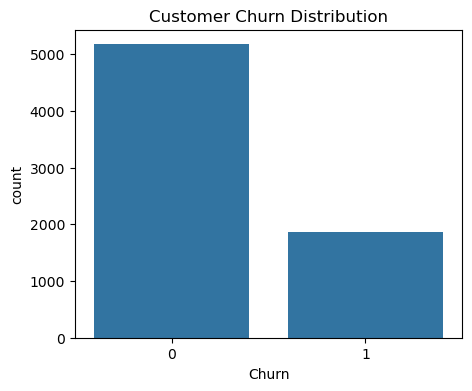

In [3]:
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.show()


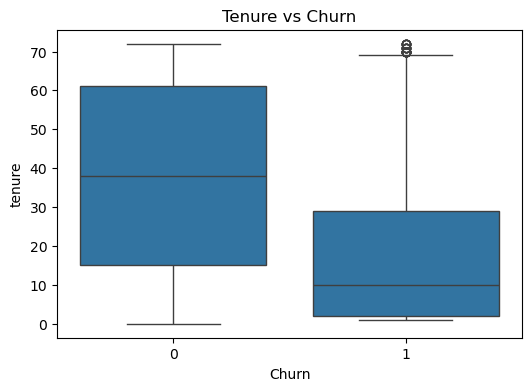

In [4]:
# Tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()


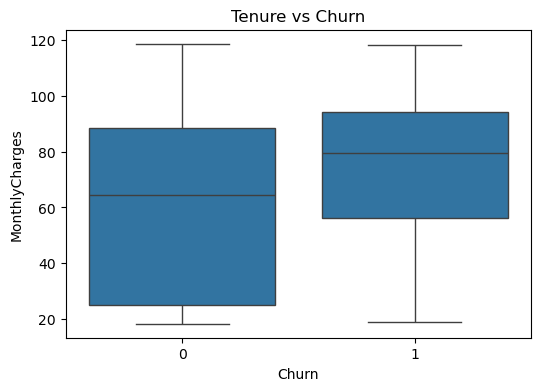

In [7]:
# Monthly Charges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Tenure vs Churn")
plt.show()


# Encoding

In [8]:
df_encoded = pd.get_dummies(df, drop_first = True)

# Train Model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]
X_train, X_test, y_train, y_test = train_test_split(
    X ,y, test_size=0.25, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("accuracy:",accuracy_score(y_test, y_pred))

accuracy: 0.8137421919363997


C:\Users\adithiyha\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


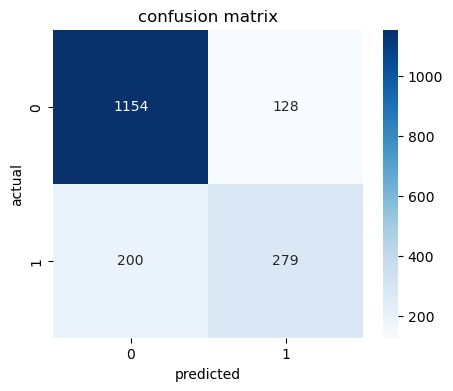

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix")
plt.show()

# Random Forest – Customer Churn

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Train Random Forest Model

In [48]:
rf_model = RandomForestClassifier(
     n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

# Predictions

In [49]:
rf_pred = rf_model.predict(X_test)

# Accuracy

In [50]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8001135718341851


# Confusion Matrix

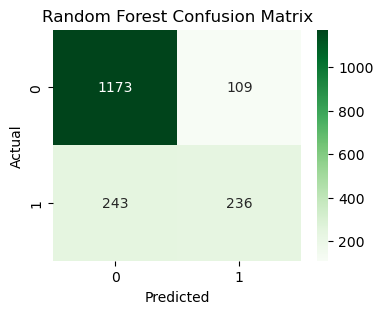

In [51]:
rf_cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(4,3))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


# Classification Report

In [52]:
print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_pred))


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1282
           1       0.68      0.49      0.57       479

    accuracy                           0.80      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



# Compare Logistic vs Random Forest

In [53]:
print("Logistic Regression Accuracy:", 0.8137)
print("Random Forest Accuracy:", rf_accuracy)


Logistic Regression Accuracy: 0.8137
Random Forest Accuracy: 0.8001135718341851
